<a href="https://www.kaggle.com/code/ibrahimawad02/da-task3?scriptVersionId=139459023" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Welcome to the flight predictions notebook
- The data is collected from an online flight booking site in India.
- It represents the flights going to and from 6 indian cities locally.
- It also has the time of the reservation of the ticket and the duartion of the flight from an airport to another.
- Finally it contains the class of the flight and the prices of it.
***
## Contents
1. analyzing the data and understanding it
2. studying the price data
3. getting insights from the given business questions
4. Giving offers
5. Conclusion

***
> the insights are presented to you by **Ibrahim Hossam**

### Business Questions
- What is the ratio between the airline in the market?
- What is the ratio between Business class and Economy class?
- What is the ratio between the number of the stops in the flights?
- What is the ratio between the arrival and departure times of the flights?
- What is the ratio between the source and destination cities?
- Depending on the correlation matrix, which variables have a strong relationship with each other?
- From the previous question,What is the relationship between the duration and days left before departure?
- From the correlation matrix ,What is the relationship between the number of stops and duration?
- Does all of the airlines provide flights to all cities?
- Does all of the airlines provide Business class?
- Is there a strong relationship between the price and the number of stops?
- What is the most expensive ticket and on which flight?

-------
- We want to give offers according to the Arrival times, can you explain that? Using Visulization
- We want to present offers by number of stops, could you explain that? Using Visulization
- We want to present offers by duration of the flight, could you explain that? Using Visulization

# Reading the data and analyzing it

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Importing libraries for data visualiztion
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df= pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv" , sep = "," ,encoding = "utf-8")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
# Dropping the first column since it is of no value for analysis and faster to load the data
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df["stops"].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [7]:
#Changing the stops into numeric values to be easier in analysis
df['stops'].replace("zero" , 0 , inplace = True)
df['stops'].replace("one" , 1 , inplace = True)
df['stops'].replace("two_or_more" , 2 , inplace = True)

In [8]:
df["stops"].value_counts()

1    250863
0     36004
2     13286
Name: stops, dtype: int64

In [9]:
df["price"].agg(["min" , 'max' , 'mean' , "std", "median"])

min         1105.000000
max       123071.000000
mean       20889.660523
std        22697.767366
median      7425.000000
Name: price, dtype: float64

- <span style="font-size:20px;"> Since the median is smaller than the mean, the distribution will be right-skewed </span>

In [10]:
import plotly.express as px
fig = px.histogram(df, x="price")
fig.show()

### Let's check if there is an outlier

<Axes: xlabel='price'>

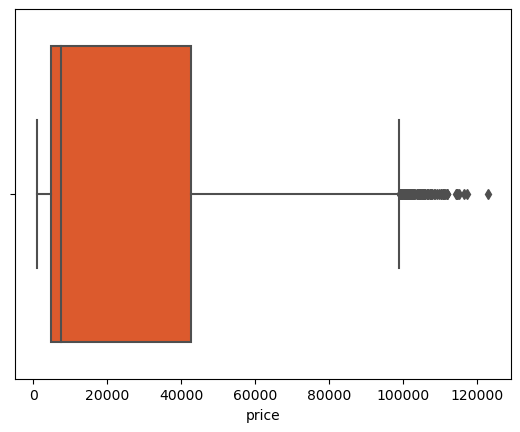

In [11]:
sns.boxplot(data=df, x="price", color = "#F94C10")

- <span style="font-size:20px;"> There are outliers </span>

# Business questions

## What is the ratio between the airline in the market?

In [12]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

<Axes: ylabel='airline'>

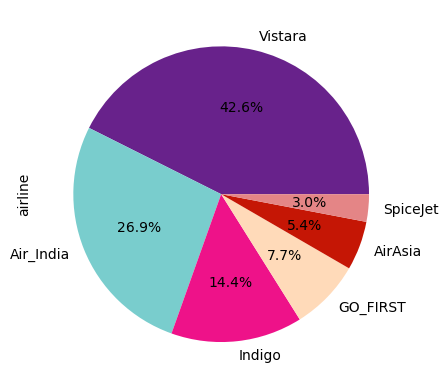

In [13]:
round(df['airline'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%", colors = ["#68228B" , '#79CDCD' , '#EE1289' , '#FFDAB9', '#C51605', '#E48586'])

## What is the ratio between Business class and Economy class?

In [14]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

<Axes: ylabel='class'>

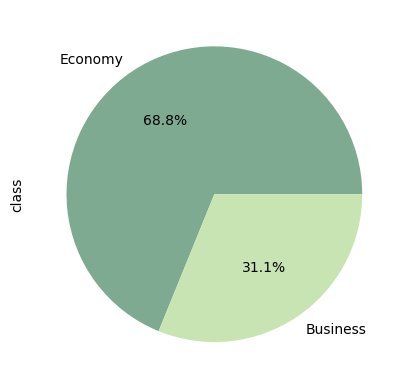

In [15]:
round(df['class'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%", colors = ["#7EAA92" , '#C8E4B2'])

## What is the ratio between the number of the stops in the flights?

In [16]:
round(df['stops'].value_counts()/df.shape[0]*100,2)

1    83.58
0    12.00
2     4.43
Name: stops, dtype: float64

<Axes: xlabel='stops', ylabel='count'>

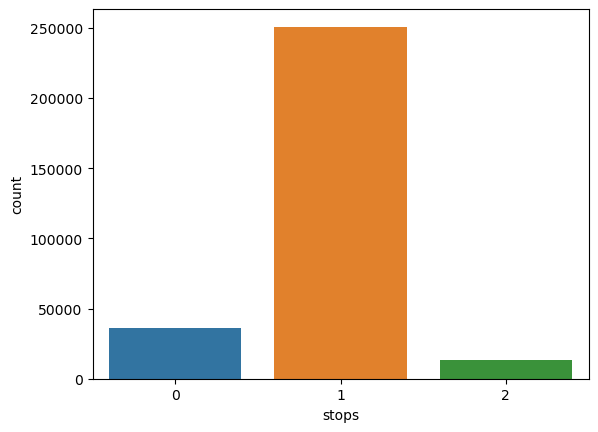

In [17]:
sns.countplot(data = df, x = 'stops')

## What is the ratio between the arrival and departure times of the flights?

### Arrival times ratio

In [18]:
round(df['arrival_time'].value_counts()/df.shape[0]*100,2)

Night            30.50
Evening          26.09
Morning          20.90
Afternoon        12.71
Early_Morning     5.14
Late_Night        4.66
Name: arrival_time, dtype: float64

<Axes: xlabel='arrival_time', ylabel='count'>

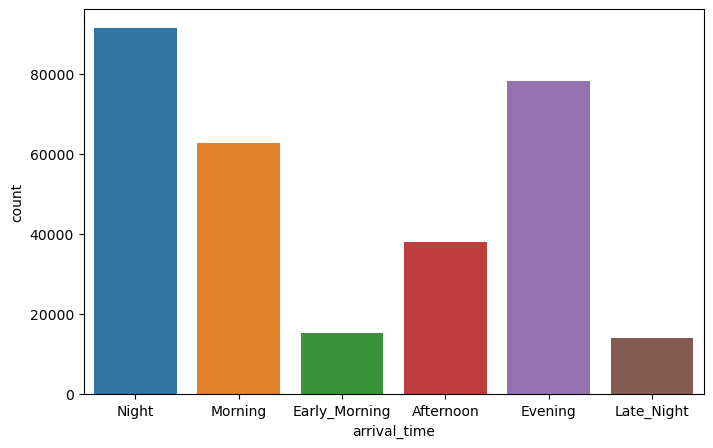

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x= 'arrival_time')

- <span style="font-size:20px;"> Late night has the least flights, we can make offers for those to increase late night users. More explanation in the offers and conclusions section </span>

### Departure times ratio

In [20]:
round(df['departure_time'].value_counts()/df.shape[0]*100,2)

Morning          23.70
Early_Morning    22.25
Evening          21.69
Night            16.00
Afternoon        15.92
Late_Night        0.44
Name: departure_time, dtype: float64

<Axes: xlabel='departure_time', ylabel='count'>

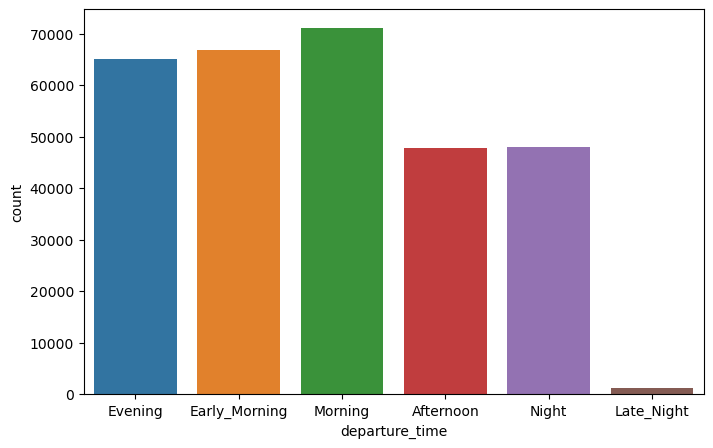

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x= 'departure_time')

- <span style="font-size:20px;"> Late night has the least flights, we can make offers for those to increase late_night users. More explaination in the conclusions section </span>

## What is the ratio between the source and destination cities?

### Source cities ratio

In [22]:
round(df['source_city'].value_counts()/df.shape[0]*100,2)

Delhi        20.44
Mumbai       20.29
Bangalore    17.34
Kolkata      15.44
Hyderabad    13.60
Chennai      12.89
Name: source_city, dtype: float64

<Axes: ylabel='source_city'>

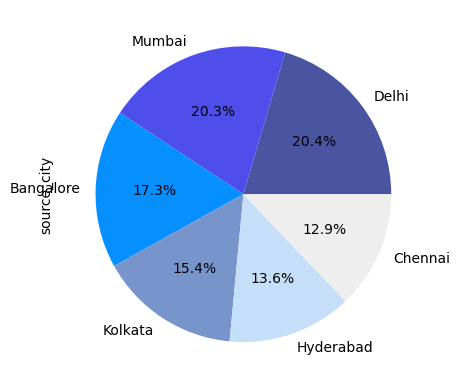

In [23]:
round(df['source_city'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%", colors = ["#4A55A2" , '#4E4FEB' , '#068FFF' , '#7895CB', '#C5DFF8', '#EEEEEE'])

- <span style="font-size:20px;"> Delhi has the most departure flights and Chennai has the least departure flights. More explanation in the conclusions section </span>

### Destination cities ratio

In [24]:
round(df['destination_city'].value_counts()/df.shape[0]*100,2)

Mumbai       19.69
Delhi        19.11
Bangalore    17.01
Kolkata      16.50
Hyderabad    14.23
Chennai      13.45
Name: destination_city, dtype: float64

<Axes: ylabel='destination_city'>

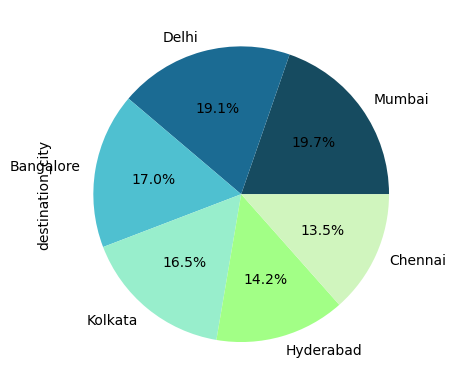

In [25]:
round(df['destination_city'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%", colors = ["#164B60" , '#1B6B93' , '#4FC0D0' , '#98EECC', '#A2FF86', '#D0F5BE'])

- <span style="font-size:20px;"> Delhi has the most arrival flights and Chennai has the least arrival flights.  </span>
- <span style="font-size:20px;"> More explanation in the conclusions section </span>

## Depending on the correlation matrix, which variables have a strong relationship with each other?

### First, let's calculate the correlation

In [26]:
df.corr()

/tmp/ipykernel_21/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,stops,duration,days_left,price
stops,1.000000,0.468059,-0.008540,0.119648
duration,0.468059,1.000000,-0.039157,0.204222
days_left,-0.008540,-0.039157,1.000000,-0.091949
price,0.119648,0.204222,-0.091949,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



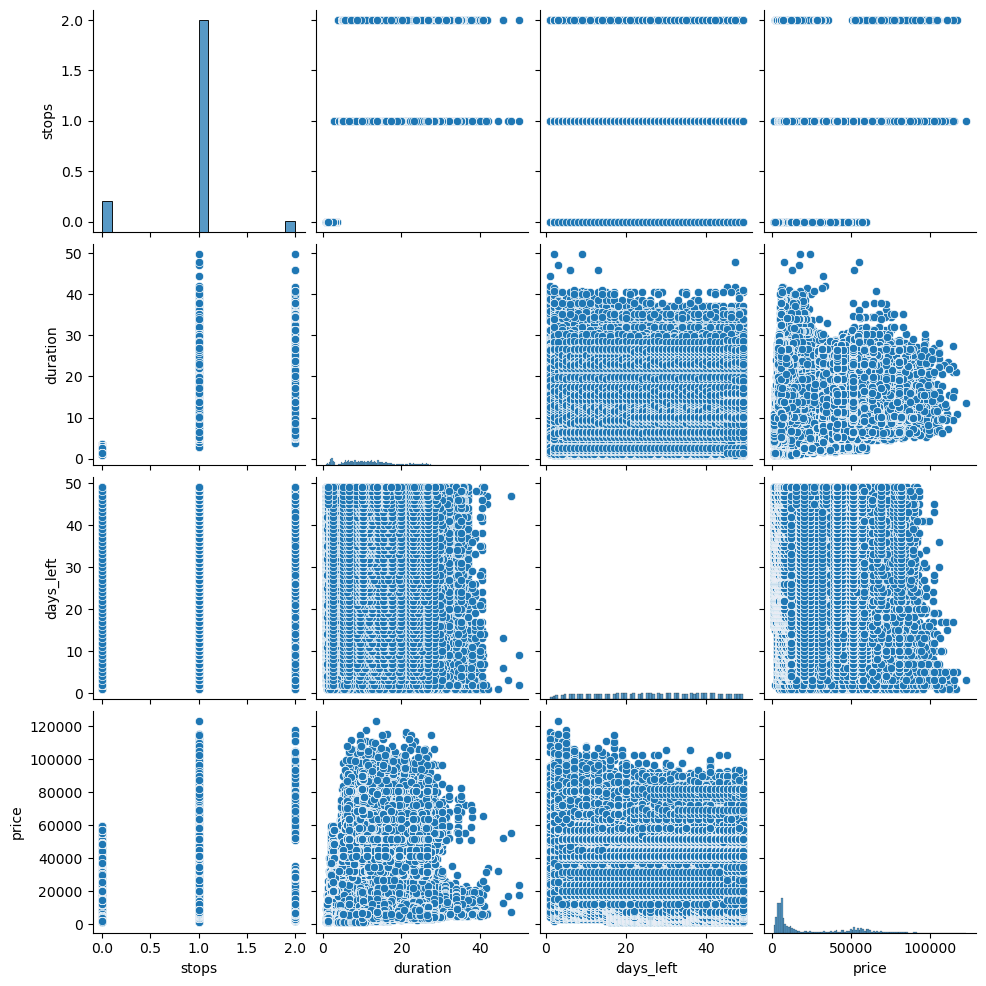

In [27]:
sns.pairplot(df)

/tmp/ipykernel_21/1301734482.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

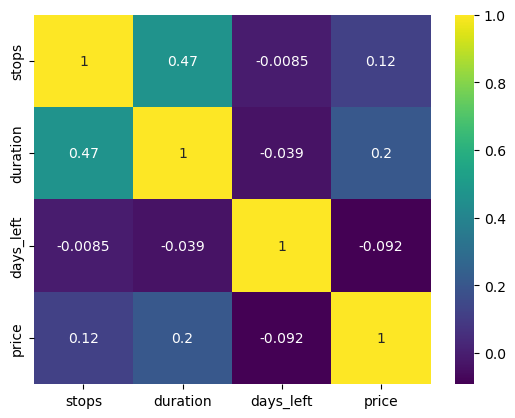

In [28]:
sns.heatmap(df.corr(), annot = True, cmap = "viridis")

- <span style="font-size:20px;"> The strongest relationship is between duration and stops. The variable the has the strongest relation with price is duration and the variable that has the weakest relation with the price is days left.</span>
- <span style="font-size:20px;"> Further Explanations to be given in the conclusions
</span>

## From the previous question,What is the relationship between the duration and days left before departure?

- <span style="font-size:20px;"> The correlation between them is very small so let's visualize it
</span>

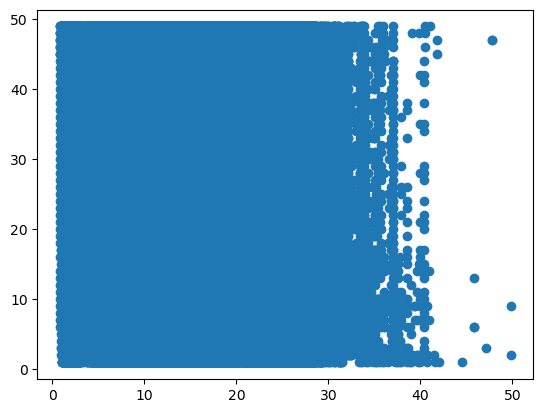

In [29]:
plt.scatter(df['duration'] , df['days_left'])

Text(0.5, 1.0, 'Relation between days left and duration')

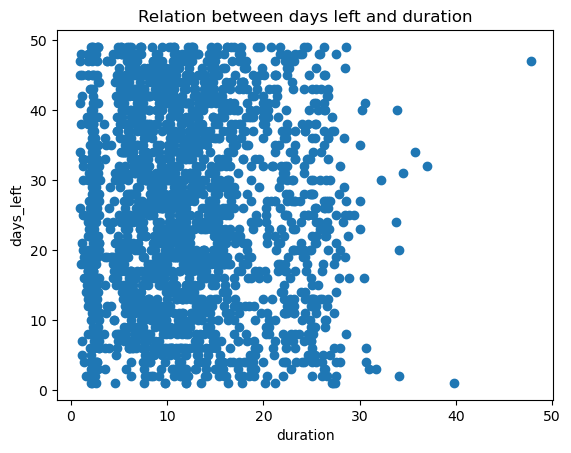

In [30]:
# we will take a sample because the data is large
dfs = df.sample(2000)
plt.scatter(dfs['duration'] , dfs['days_left'])
plt.xlabel('duration')
plt.ylabel('days_left')
plt.title("Relation between days left and duration")

## From the correlation matrix ,What is the relationship between the number of stops and duration?

- <span style="font-size:20px;"> the correlation between them is relatively large
</span>

Text(0.5, 1.0, 'Relation between stops and duration')

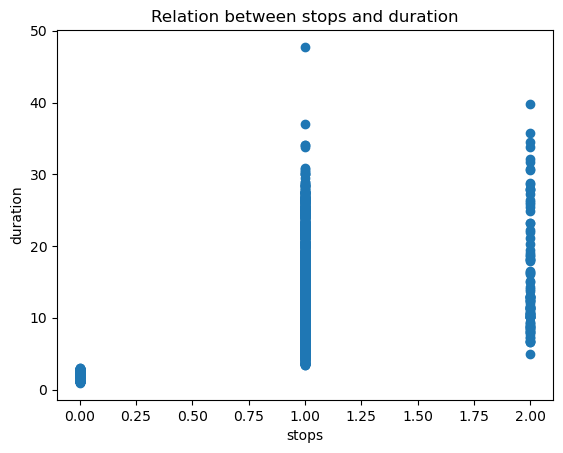

In [31]:
plt.scatter(dfs['stops'] , dfs['duration'])
plt.xlabel('stops')
plt.ylabel('duration')
plt.title("Relation between stops and duration")

- <span style="font-size:20px;"> It is observed that they are directly proportional
</span>

## Does all of the airlines provide flights to all cities?

In [32]:
df.groupby(["airline", "destination_city"]).sum()

/tmp/ipykernel_21/3966749196.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



stops   duration  days_left      price
airline   destination_city                                        
AirAsia   Bangalore          3138   28443.50      94238   15563837
          Chennai            1401   13383.54      42914    5199824
          Delhi              4506   42374.46     123196   19083655
          Hyderabad          1534   13393.13      42425    6376227
          Kolkata            2984   23471.89      76835   11258624
          Mumbai             2347   22877.20      66873    8375922
Air_India Bangalore         11646  190056.81     300631  304181091
          Chennai           11318  183758.02     287046  279751840
          Delhi             12417  195371.13     376088  313215408
          Hyderabad         11952  196207.36     305371  257204849
          Kolkata           12930  216555.42     329565  324996231
          Mumbai            17699  272219.86     463840  422180371
GO_FIRST  Bangalore          3900   36176.01     118784   25077024
          Chennai            1394   13634.82      43297    7956038
          Delhi              4807   43542.95     152235   31842920
          Hyderabad          2281   23772.44      72115   12570802
          Kolkata            3407   38571.97     101579   23193006
          Mumbai             4566   47190.23     147635   30334182
Indigo    Bangalore          5037   40092.40     181583   33685311
          Chennai            4959   37950.71     167829   31297211
          Delhi              5771   46888.08     214582   44345066
          Hyderabad          4479   33217.73     162862   30419095
          Kolkata            7289   52106.07     218021   52338827
          Mumbai             5107   39633.89     187640   37494697
SpiceJet  Bangalore           745   13636.91      27298    6661320
          Chennai             784   14391.48      26792    6620322
          Delhi              1857   31956.76      62180   15534473
          Hyderabad           265    2771.36       8466    2268942
          Kolkata            1632   28240.95      49642   13615703
          Mumbai             1266   22358.82      42993   10980722
Vistara   Bangalore         23398  307374.29     607715  717591551
          Chennai           19938  275346.16     482515  555386547
          Delhi             18748  242910.06     573326  633511483
          Hyderabad         20195  302394.97     519815  563952341
          Kolkata           20325  295643.16     506676  662342333
          Mumbai            21413  280261.52     620802  753686480

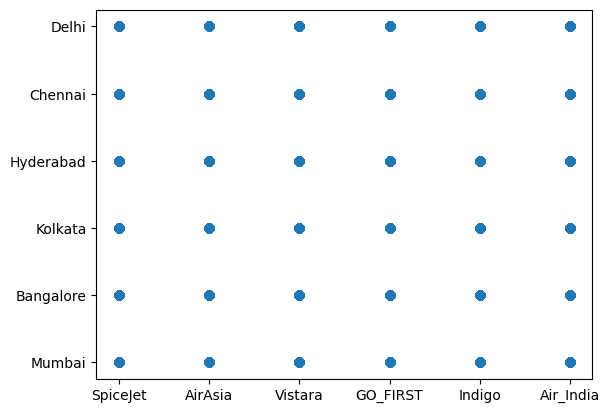

In [33]:
plt.scatter(df['airline'] , df['destination_city'])

- <span style="font-size:20px;"> All airlines provide flights to all of the cities
</span>

## Does all of the airlines provide Business class?

In [34]:
df.groupby(["airline", "class"]).sum()

/tmp/ipykernel_21/3431821467.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



stops   duration  days_left       price
airline   class                                            
AirAsia   Economy   15910  143943.72     446481    65858089
Air_India Business  30028  481459.50     830615  1550516928
          Economy   47934  772709.10    1231926   351012862
GO_FIRST  Economy   20355  202888.42     635645   130973972
Indigo    Economy   32642  249888.88    1132517   229580207
SpiceJet  Economy    6549  113356.28     217371    55681482
Vistara   Business  56440  799711.95    1575914  3361297636
          Economy   67577  904218.21    1734935   525173099

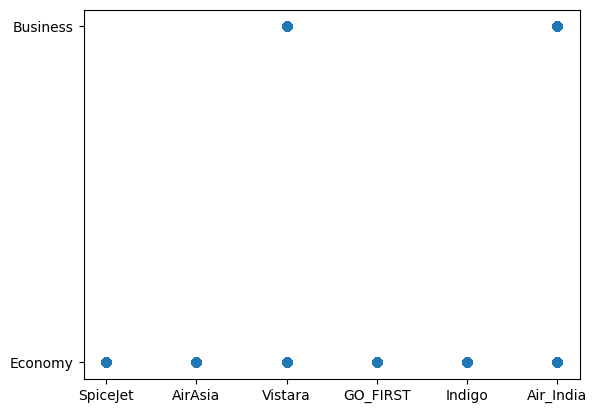

In [35]:
plt.scatter(df['airline'] , df['class'])

- <span style="font-size:20px;"> The answer is not all of them have business class
</span>

## Is there a strong relationship between the price and the number of stops?

In [36]:
zero_stops = df[df['stops'] == 0]
one_stop = df[df['stops'] == 1]
two_or_more_stops = df[df['stops'] == 2]
print(f"The mean of the price of zero stops tickets is {zero_stops['price'].mean()}\nThe mean of the price of one stop tickets is {one_stop['price'].mean()}\nThe mean of the price of two stops or more tickets is {two_or_more_stops['price'].mean()}")

The mean of the price of zero stops tickets is 9375.938534607265
The mean of the price of one stop tickets is 22900.9924819523
The mean of the price of two stops or more tickets is 14113.450775252146


<Axes: xlabel='price', ylabel='Density'>

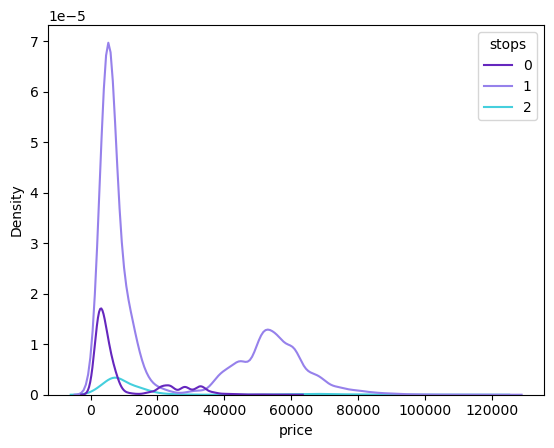

In [37]:
sns.kdeplot(data=df, x="price", hue = "stops", palette = ['#6527BE', '#9681EB', '#45CFDD'])

- <span style="font-size:20px;"> It is observed that the number of stops does not affect the price significintally  </span>

## What is the most expensive ticket and on which flight?

In [38]:
df.loc[df['price'].idxmax()]

airline              Vistara
flight                UK-772
source_city          Kolkata
departure_time       Morning
stops                      1
arrival_time           Night
destination_city       Delhi
class               Business
duration                13.5
days_left                  3
price                 123071
Name: 261377, dtype: object

- <span style="font-size:20px;"> The most expensive ticket is on UK-772 from kolkata to delhi  </span>

In [39]:
df[(df['flight'] == 'UK-772') & (df['source_city'] == 'Kolkata') & (df['destination_city'] == 'Delhi') & (df['departure_time'] == 'Morning') & (df['arrival_time'] == 'Night') & (df['duration'] == 13.5)]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
119889,Vistara,UK-772,Kolkata,Morning,1,Night,Delhi,Economy,13.5,2,25284
120029,Vistara,UK-772,Kolkata,Morning,1,Night,Delhi,Economy,13.5,4,24759
261329,Vistara,UK-772,Kolkata,Morning,1,Night,Delhi,Business,13.5,2,90737
261377,Vistara,UK-772,Kolkata,Morning,1,Night,Delhi,Business,13.5,3,123071
261429,Vistara,UK-772,Kolkata,Morning,1,Night,Delhi,Business,13.5,4,82975


- <span style="font-size:20px;"> It is observed that all the prices on this flight is more expensive than the median of the prices   </span>

# Offers can be made

## We want to give offers according to the Arrival times, can you explain that? Using Visulization

<Axes: xlabel='arrival_time', ylabel='count'>

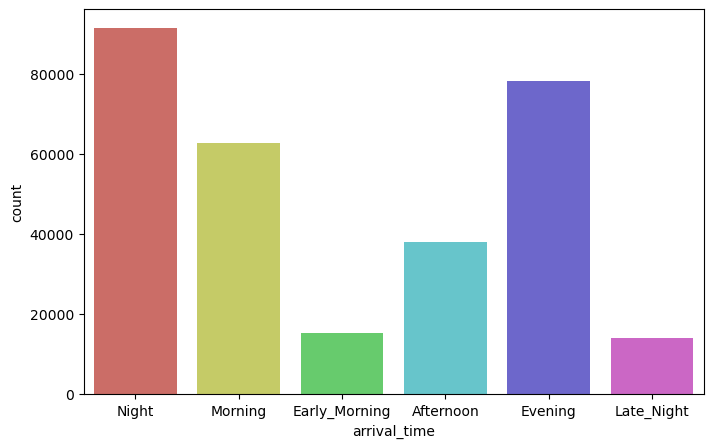

In [40]:
# First the visualiztion:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x= 'arrival_time', palette = 'hls')

- <span style="font-size:20px;"> Since Early morning and late night have the least visitors we can make them offers as the following   </span>
- <span style="font-size:17px;"> Early morning offer : The ticket will give a discount on a ride to the visitor's place collaborating with taxi services or apps such as Uber and etc.   </span>
- <span style="font-size:17px;"> Late night offer : The ticket will give a discount on a night at a nearby hotel + early morning offer to transport the visitor to his desired place in the morning next day  </span>

In [41]:
def Get_time_offer(row):
    if row['arrival_time'] == "Early_Morning":
        return("EM_Offer")
    elif row['arrival_time'] == "Late_Night":
        return("LN_Offer")
    else :
        return "No_Offer"


In [42]:
df['time_offer'] =df.apply(Get_time_offer , axis = 1)

In [43]:
df['time_offer'].value_counts()

No_Offer    270735
EM_Offer     15417
LN_Offer     14001
Name: time_offer, dtype: int64

<Axes: ylabel='time_offer'>

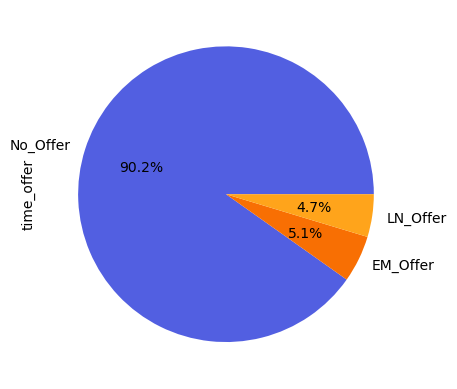

In [44]:
round(df['time_offer'].value_counts()).plot.pie(autopct = "%1.1f%%", colors = ["#525FE1" , '#F86F03', '#FFA41B'])

## We want to present offers by number of stops, could you explain that? Using Visulization

<Axes: xlabel='stops', ylabel='count'>

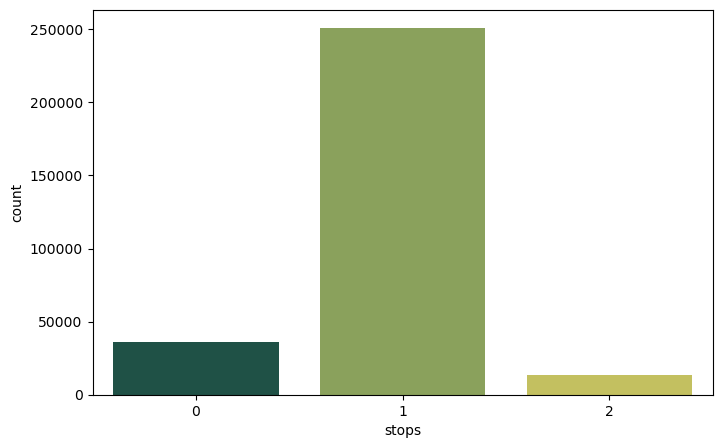

In [45]:
# First the visualiztion:
plt.figure(figsize=(8, 5))
sns.countplot(data = df, x= 'stops', palette = ['#17594A', '#8EAC50', '#D3D04F'])

- <span style="font-size:20px;"> Since two stops and more is the least bought tickets we can make the following offers:  </span>
- <span style="font-size:17px;"> Two_stops first offer : The ticket will give a discount on restaurants in both stops   </span>
- <span style="font-size:17px;"> Two_stops second offer : The ticket will give a discount on VIP waiting room in the airport for long duration flights  </span>

In [46]:
def Get_stop_offer(row):
    if row['stops'] == 2:
        if row['duration'] > 12:
            return("Two_Stop_S_Offer") # S : second offer
        else:
            return("Two_Stop_F_Offer") # F : first offer
    else :
        return "No_offer"


In [47]:
df['stops_offer'] =df.apply(Get_stop_offer , axis = 1)

In [48]:
df['stops_offer'].value_counts()

No_offer            286867
Two_Stop_S_Offer      7323
Two_Stop_F_Offer      5963
Name: stops_offer, dtype: int64

<Axes: ylabel='stops_offer'>

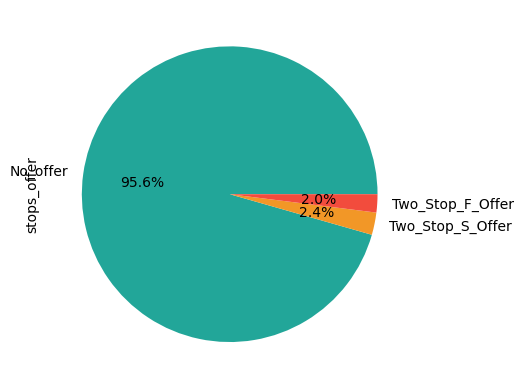

In [49]:
round(df['stops_offer'].value_counts()).plot.pie(autopct = "%1.1f%%", colors = ["#22A699" , '#F29727', '#F24C3D'])

## We want to present offers by duration of the flight, could you explain that? Using Visulization

<Axes: xlabel='duration', ylabel='Density'>

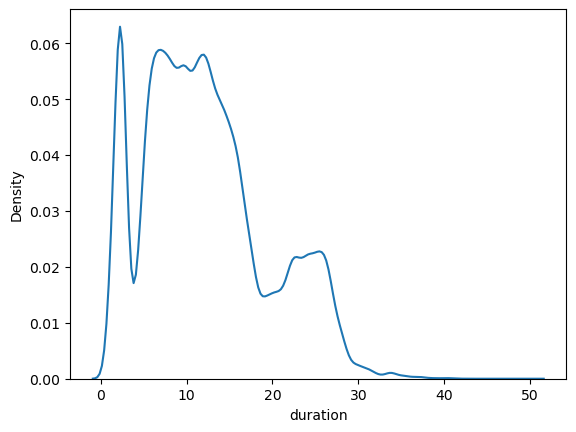

In [50]:
sns.kdeplot(data = df, x = 'duration')

- <span style="font-size:20px;"> We can see that when is duration of the flight is longer than 20 hours the number of buyers decrease so we can make the following offers:  </span>
- <span style="font-size:17px;"> Medium duration offer : If the duration of the flight is longer than 20 hours and less than 30 hours The ticket will give discount on the next flight 1% per each additional hour.   </span>
- <span style="font-size:17px;"> long duration offer : If the duration of the flight is longer than 30 hours The ticket will give discount on the next flight 2.5% per each additional hour.  </span>

In [51]:
def Get_duration_offer(row):
    if row['duration'] >= 30:
        return(f"next discount = {round((row['duration']-30)*2.5, 1)}%")
    elif row['duration'] >= 20:
        return(f"next discount = {round((row['duration']-20)*2.5, 1)}%")
    else :
        return "No_offer"


In [52]:
df['duration_offer'] =df.apply(Get_duration_offer , axis = 1)

In [53]:
df['duration_offer'].value_counts()

No_offer                 249226
next discount = 5.6%       1052
next discount = 10.8%       993
next discount = 5.8%        978
next discount = 8.3%        825
                          ...  
next discount = 30.0%         1
next discount = 27.7%         1
next discount = 42.7%         1
next discount = 36.2%         1
next discount = 28.8%         1
Name: duration_offer, Length: 137, dtype: int64

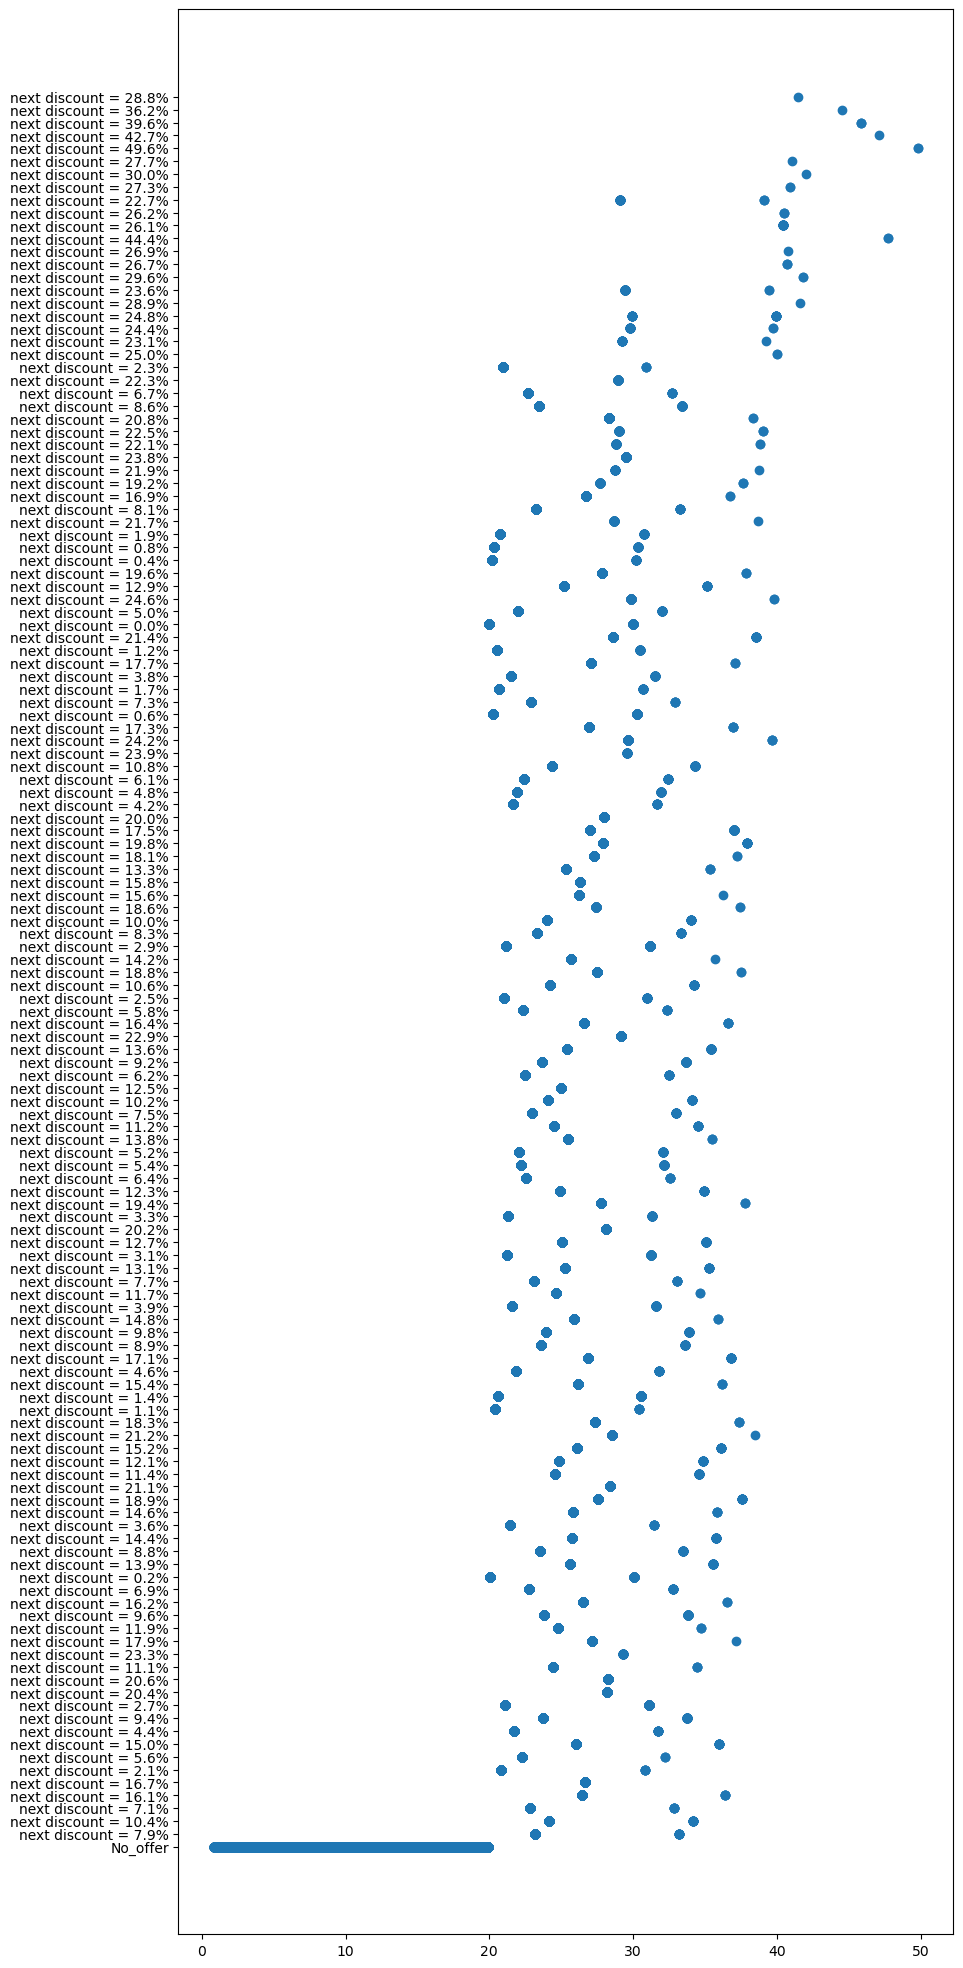

In [54]:
plt.figure(figsize=(10, 25))
plt.scatter(df['duration'] , df['duration_offer'])

# Conclusins

## Some visualiztions to conclude from

In [55]:
df.groupby(['class']).sum().sort_values("price" , ascending= False)

/tmp/ipykernel_21/755412326.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,stops,duration,days_left,price
class,,,,
Business,86468,1281171.45,2406529,4911814564
Economy,190967,2387004.61,5398875,1358279711


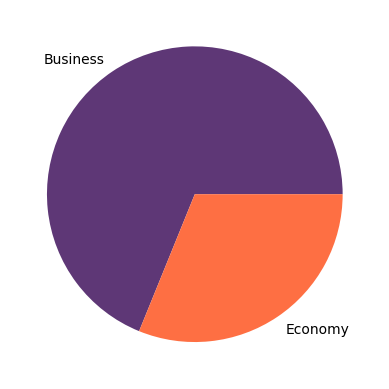

In [56]:
class_labels = "Business", "Economy"
plt.pie(df['class'].value_counts(), labels = class_labels, colors = ["#5e3776", "#fe6f43"])
plt.show()

## Conclusions from the data
- <span style="font-size:18px;"> Visatra is the biggest airline company with 42% of marketshare.  </span>
- <span style="font-size:18px;"> Only two airlines provide business class tickets which are visatra and Air_India.  </span>
- <span style="font-size:18px;"> Although there are more economy tickets, the money coming from Business tickets is more and this is due to the difference in prices between the two classes.  </span>
### Why is late night is the least to have arriving or departing visitors?
- <span style="font-size:18px;"> My opinion is because it is hard to find transportation at that time and at that time it's hard to have someone pick you up.  </span>
### Why is Delhi more crowded than Chennai in arrival and departure flights?
- <span style="font-size:18px;"> I think it is because Delhi is the capital of India and chennai is a coastal city in the tamil region 2212KM south of Delhi where they are not very rich and the population in Chennai is less than Delhi.  </span>

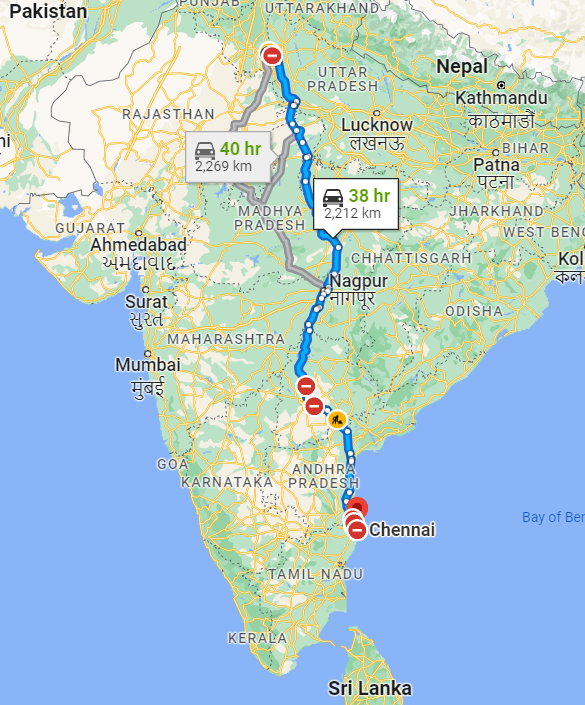

### It is observed from the correlation matrix that stops and duration hve the strongest relation, why?
- <span style="font-size:18px;"> It is due to the duration of a flight includes the transit time so, as the number of stops increase the duration of the flight will increase.</span>
### Why is Duration the most related variable to price in the correlation matrix?
- <span style="font-size:18px;"> In my opinion, it is because as the duration of flight increase the amount of fuel used by the plane will also increase. Therefore, the price of the ticket will increase to compensate for the fuel cost.  </span>
### Why does not number of stops affect the price significantly?
- <span style="font-size:18px;"> I think it is because the passenger will not want to take a flight that takes longer than the train and if there are multiple stops during the flight then it will not be very comfortable. Accordingly, such flight tickets must be cheaper to be bought.  </span>
### Why are the tickets on the most expensive flight expensive?
- <span style="font-size:18px;"> Due to less numbers on the plane (only 5 passengers) which makes me think it is a private jet or a small plane for important people. That being the case makes it the most expensive flight.  </span>

# Thanks for reading 
# Yours sincerely, Ibrahim Hossam